In [19]:
import gym
import numpy as np
import time, pickle, os

env = gym.make('FrozenLake-v0')



#lr_rate = 0.49
#gamma = 0.986



In [21]:
epsilon = 0.9
min_epsilon = 0.05
max_epsilon = 1.0
decay_rate = 0.001

total_episodes = 10000
max_steps = 100

lr_rates = [0.235] # np.arange(0.2, 0.31, 0.01)
gammas = [1.0] #np.arange(0.8, 1.01, 0.05) # [0.5] #np.arange(0.45, 0.56, 0.025) #[0.5] # 

In [22]:
def choose_action(state):
    action = 0
    if np.random.uniform(0,1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state,:])
    return action

In [23]:
def learn(state, state2, reward, action, action2, done):
    predict = Q[state, action]
    if done:
        target = reward
    else:
        target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + lr_rate* (target - predict)

In [24]:
# Start

rewards = np.zeros((len(gammas), len(lr_rates), total_episodes))

for gamma_index in np.arange(0,len(gammas)):
    gamma = gammas[gamma_index]
    for lr_index in np.arange(0,len(lr_rates)):
        lr_rate = lr_rates[lr_index]

        print("Learning rate: %0.4f and Discount factor gamma: %0.4f" % (lr_rate, gamma))
        Q = np.zeros((env.observation_space.n, env.action_space.n))

        for episode in range(total_episodes):
            episode_reward = 0
            t = 0
            state = env.reset()
            action = choose_action(state)

            while (t < max_steps):
                #env.render()

                state2, reward, done, info = env.step(action)
                action2 = choose_action(state2)

                learn(state, state2, reward, action, action2, done)

                state = state2
                action = action2

                t += 1
                episode_reward += reward

                if done:
                    break

                #time.sleep(0.1)
                os.system('clear')
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
            rewards[gamma_index,lr_index,episode] = episode_reward
            #print("Episode %d with reward %f" % (episode, episode_reward))
     
        total_rewards = np.sum(rewards[gamma_index,lr_index,:])
        print("Score over time: ", total_rewards/total_episodes)
        average_reward = total_rewards/total_episodes
        with open("frozenLake_qTable_sarsa_gamma_%0.4f_lr_rate_%0.4f_reward_%0.4f.pkl" % (gamma,lr_rate,average_reward), 'wb') as f:
            pickle.dump(Q, f)

        #with open("frozenLake_qTable_sarsa.pkl", 'wb') as f:
            #pickle.dump(Q, f)

#with open("frozenLake_qTable_sarsa_rewards.pkl",'wb') as f:
#    pickle.dump(gammas, f)
#    picke.dump(lr_rates,f)
#    pickle.dump(rewards, f)

Learning rate: 0.2350 and Discount factor gamma: 1.0000
Score over time:  0.3426


<IPython.core.display.Javascript object>


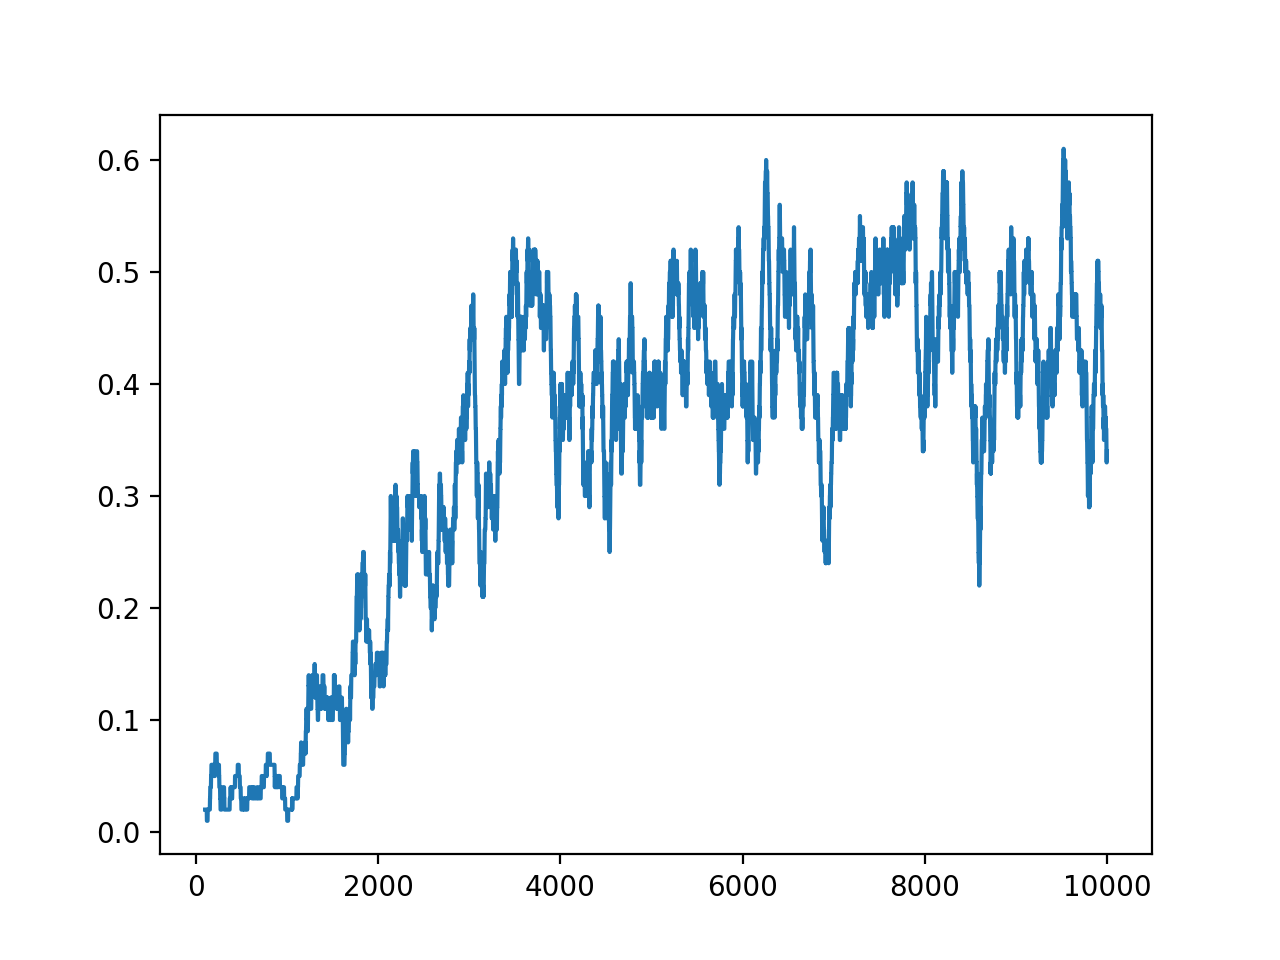

In [27]:
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot
d = pd.Series(rewards[gamma_index,lr_index,:])
pyplot.plot(np.arange(0,total_episodes),d.rolling(100).mean())
pyplot.show()

In [12]:
print(rewards[0,0,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [11]:
with open("frozenLake_qTable_sarsa_rewards.pkl",'wb') as f:
    pickle.dump(gammas, f)
    pickle.dump(lr_rates,f)
    pickle.dump(rewards, f)

In [12]:
print(gammas)

[0.8  0.85 0.9  0.95 1.  ]


In [13]:
print(lr_rates)

[0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 ]


In [18]:
lr_rates[3], gammas[4]

(0.23000000000000004, 1.0000000000000002)

In [28]:
gamma_index = 0

In [27]:
lr_index = 0

In [29]:
rewards[gamma_index,lr_index]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.